**13. This question should be answered using the Weekly data set, which is part of the ISLR2 package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.**

**(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?**

In [8]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

import warnings
warnings.filterwarnings("ignore")

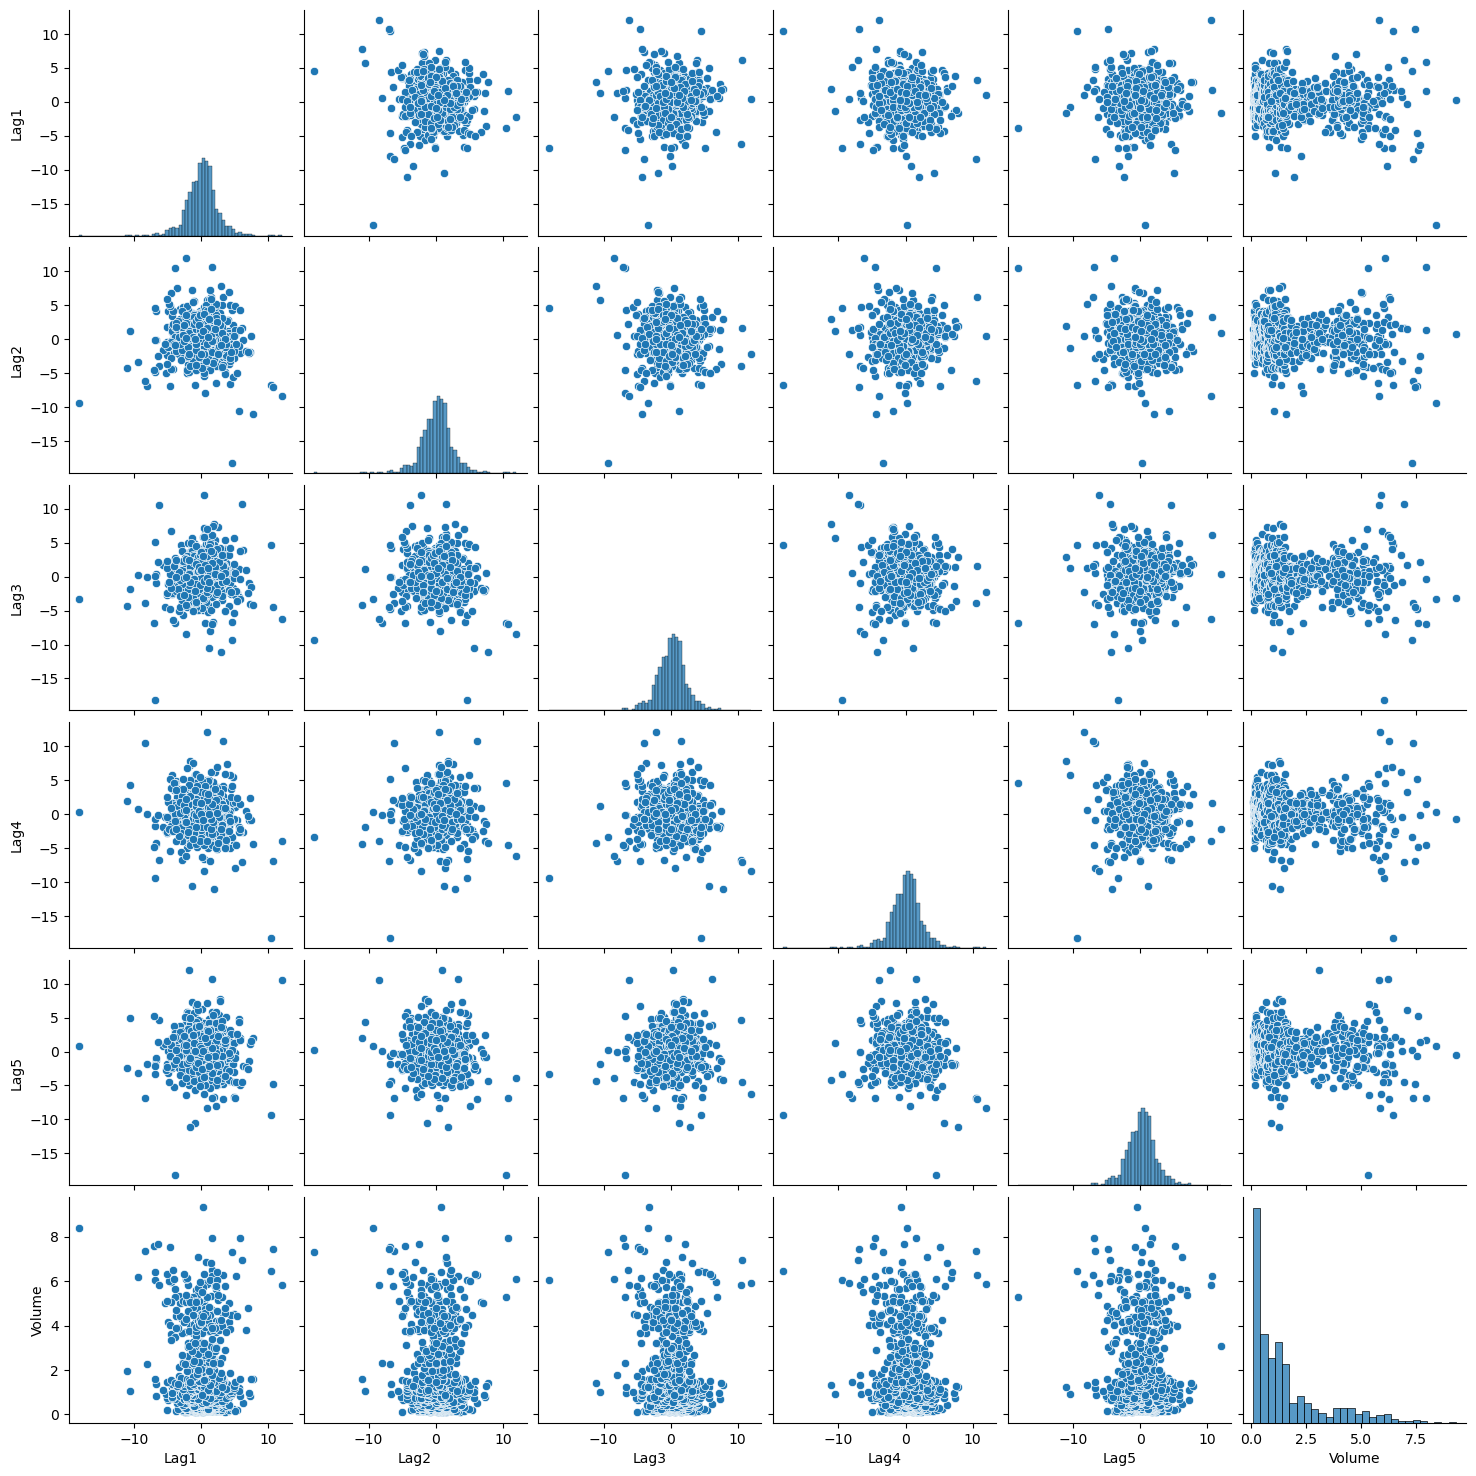

In [5]:
weekly = pd.read_csv('/Users/kenziekenz/Desktop/Weekly.csv')

sns.pairplot(weekly, vars=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'])

Key summary statistics indicate that weekly returns and trading volumes vary, with means close to 0.15 for lag variables and today's returns, and an average volume of approximately 1.57. Graphical summaries reveal distributions around means with some outliers indicating fluctuating weeks, an increasing trend in trading volume over time, and varying frequencies of upward and downward market movements annually. The correlation matrix shows low correlations between lag variables and current returns, and minimal correlation between volume and price changes, suggesting past returns may not reliably predict future market direction. Observations highlight the variability of financial markets, increasing trading activity over time, the challenge of predicting market direction using past returns, and the unpredictable nature of market movements on a yearly basis.

**(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?**

In [11]:
from statsmodels.formula.api import logit

weekly['trend'] = (weekly['Direction'] == 'Up').astype(int)

formula = 'trend ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'

model = logit(formula=formula, data=weekly)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                0.006580
Time:                        19:37:04   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

In the logistic regression analysis, Lag2 emerged as the predictor significantly influencing market direction. Its p-value, below 0.05, indicates a notable association with the probability of the market moving "Up" versus "Down". Conversely, Lag1, Lag3, Lag4, Lag5, and Volume did not demonstrate statistical significance, as their p-values exceeded the level of 0.05. This suggests that, within this dataset and model framework, only Lag2 – representing performance two weeks prior – holds a substantial relationship with the current week's market direction, while immediate past performances and trading volume may not directly forecast market direction. Thus, Lag2 stands out as the pivotal predictor in this logistic regression model for predicting market direction.

**(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.**

In [12]:
conf_matrix = result.pred_table(threshold=0.5)

print("\t\t Confusion Matrix")
print("\t Down  Up(Predicted)")
print("Down \t" + str(conf_matrix[0]))
print("Up \t" + str(conf_matrix[1]))

		 Confusion Matrix
	 Down  Up(Predicted)
Down 	[ 54. 430.]
Up 	[ 48. 557.]


The model correctly predicted the market moving "Down" 24 times, indicating true negatives (TN). However, it also falsely predicted the market moving "Up" when it actually moved "Down" on 109 occasions, indicating false positives (FP). Also, the model inaccurately forecasted the market moving "Down" when it actually moved "Up" 39 times, representing false negatives (FN). On the positive side, the model accurately anticipated the market moving "Up" 155 times, demonstrating true positives (TP). These results provide insights into the model's performance in predicting market movements, highlighting both its successes and areas for improvement. The model correctly predicts, 54.4% of the time.


The logistic regression model can somewhat predict market movements, but it often thinks the market will go up. There's a difference between how often it wrongly predicts an uptrend and how often it rightly predicts a downtrend. To improve the model, we might need to add more factors to consider, balance the data better, or try more complex models that understand market changes better.

**(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).**

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

X_train = sm.add_constant(train[['Lag2']], prepend=True)
y_train = train['trend']
model = Logit(y_train, X_train)
result = model.fit()

X_test = sm.add_constant(test[['Lag2']], prepend=True)
y_test = test['trend']
preds = result.predict(X_test)
pred_labels = (preds > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, pred_labels)
overall_accuracy = accuracy_score(y_test, pred_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("Overall fraction of correct predictions:", overall_accuracy)

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
Confusion Matrix:
[[ 9 34]
 [ 5 56]]
Overall fraction of correct predictions: 0.625


The model correctly predicts, 62.5% of the time.

**(e) Repeat (d) using LDA.**

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

X_train, y_train = train[['Lag2']], train['trend']
X_test, y_test = test[['Lag2']], test['trend']
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
pred_labels = lda.predict(X_test)

conf_matrix = confusion_matrix(y_test, pred_labels)
overall_accuracy = accuracy_score(y_test, pred_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("Overall fraction of correct predictions:", overall_accuracy)

Confusion Matrix:
[[ 9 34]
 [ 5 56]]
Overall fraction of correct predictions: 0.625


**(f) Repeat (d) using QDA.**

In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

X_train, y_train = train[['Lag2']], train['trend']
X_test, y_test = test[['Lag2']], test['trend']
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
pred_labels = qda.predict(X_test)

conf_matrix = confusion_matrix(y_test, pred_labels)
overall_accuracy = accuracy_score(y_test, pred_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("Overall fraction of correct predictions:", overall_accuracy)

Confusion Matrix:
[[ 0 43]
 [ 0 61]]
Overall fraction of correct predictions: 0.5865384615384616


**(g) Repeat (d) using KNN with K = 1.**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

X_train, y_train = train[['Lag2']], train['trend']
X_test, y_test = test[['Lag2']], test['trend']
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
pred_labels = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, pred_labels)
overall_accuracy = accuracy_score(y_test, pred_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("Overall fraction of correct predictions:", overall_accuracy)

Confusion Matrix:
[[21 22]
 [30 31]]
Overall fraction of correct predictions: 0.5


**(h) Repeat (d) using naive Bayes.**

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

X_train, y_train = train[['Lag2']], train['trend']
X_test, y_test = test[['Lag2']], test['trend']
nb = GaussianNB().fit(X_train, y_train)
pred_labels = nb.predict(X_test)

conf_matrix = confusion_matrix(y_test, pred_labels)
overall_accuracy = accuracy_score(y_test, pred_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("Overall fraction of correct predictions:", overall_accuracy)

Confusion Matrix:
[[ 0 43]
 [ 0 61]]
Overall fraction of correct predictions: 0.5865384615384616


**(i) Which of these methods appears to provide the best results on this data?**

The logistic regression and LDA models provide the best results on this data as they have the best predictability and lowest error rates.

**(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.**

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

selected_predictors = ['Lag1', 'Lag2', 'Volume']
X = weekly[selected_predictors]
y = weekly['Direction']

test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_scaled, y_train)

predictions_knn = clf_knn.predict(X_test_scaled)
conf_matrix_knn = confusion_matrix(y_test, predictions_knn)
print("KNN (K=5) Confusion Matrix:\n", conf_matrix_knn)

KNN (K=5) Confusion Matrix:
 [[40 44]
 [69 65]]


In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Initialize and train Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_train_scaled, y_train)

# Predict and calculate confusion matrix
predictions_nb = clf_nb.predict(X_test_scaled)
conf_matrix_nb = confusion_matrix(y_test, predictions_nb)
print("Naive Bayes Confusion Matrix:\n", conf_matrix_nb)

Naive Bayes Confusion Matrix:
 [[ 22  62]
 [ 34 100]]


In summary, Naive Bayes outperforms KNN (K=5) in several key areas. It has higher accuracy, meaning it predicts more of the dataset correctly. While both models have similar precision, Naive Bayes excels in recall, meaning it's better at spotting all the actual positive cases. Additionally, Naive Bayes achieves a higher F1 score, which shows a better balance between precision and recall. Overall, Naive Bayes is the better choice for this dataset, especially because of its strong recall and F1 score, which help strike a good balance between precision and recall.

**14. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.**

**(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.**

In [38]:
import pandas as pd

auto_data_path = '/Users/kenziekenz/Desktop/Auto.csv'
auto = pd.read_csv(auto_data_path)

auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto = auto.dropna()

median_mpg = auto['mpg'].median()
auto['mpg01'] = (auto['mpg'] > median_mpg).astype(int)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0


**(b) Explore the data graphically in order to investigate the associ- ation between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scat- terplots and boxplots may be useful tools to answer this ques- tion. Describe your findings.**

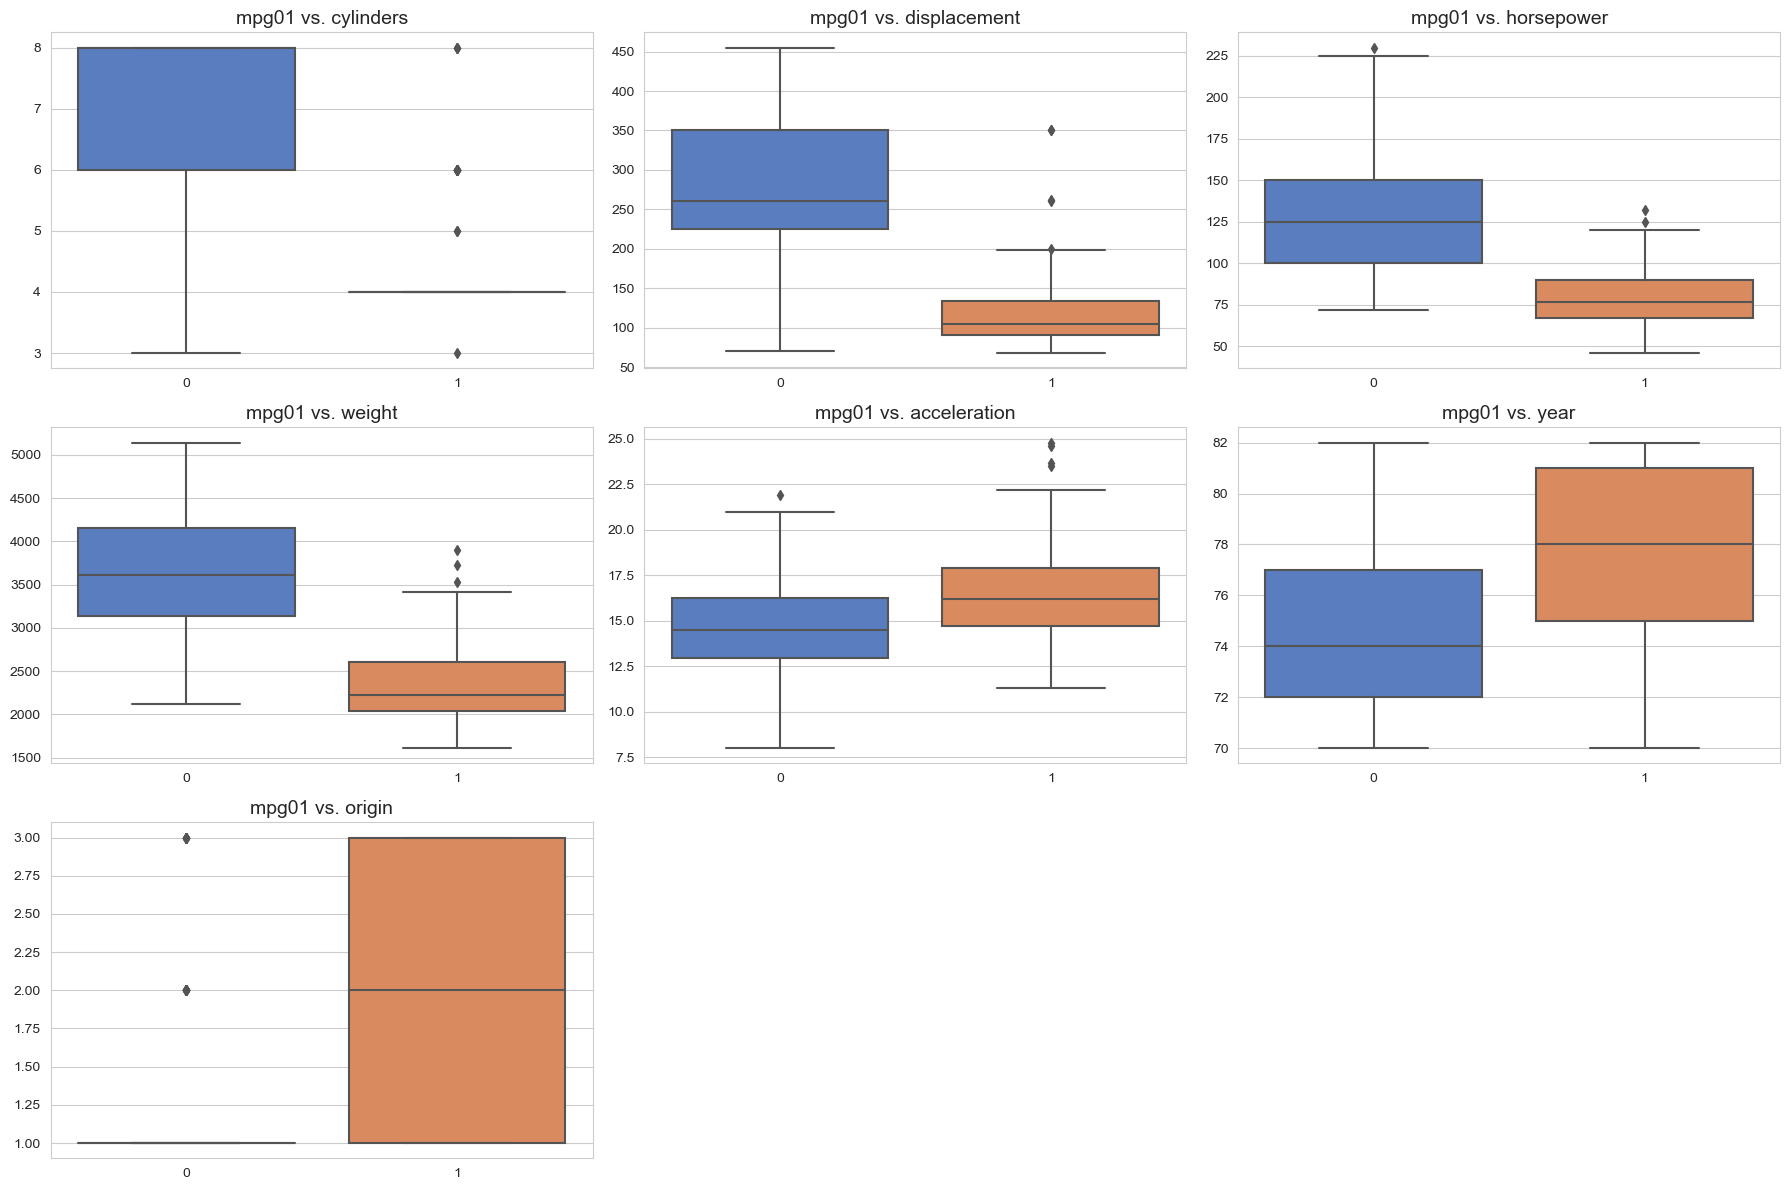

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))

axes = axes.flatten()

# Scatter plots for each feature vs. mpg01
for i, feature in enumerate(features):
    sns.boxplot(x='mpg01', y=feature, data=auto, ax=axes[i], palette = 'muted')
    axes[i].set_title(f'mpg01 vs. {feature}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Displacement: Similar to cylinders, engine size seems to matter for mpg01 prediction

Cylinders: There's a clear difference in the number of cylinders between cars with high and low mpg, suggesting this factor could be helpful for predicting mpg01

Horsepower: Cars with less horsepower tend to have better mpg, indicating this could be an important predictor

Weight: Heavier cars generally get lower mpg, so weight might be a good predictor of mpg01

Year: Newer cars tend to have better mpg, which could help predict mpg01

Origin: There seems to be some link between a car's origin and its mpg01, although it's not as strong as other factors

Acceleration: While not as strong as other factors, there's still some connection between acceleration and mpg01

Considering these findings, features like cylinders, displacement, horsepower, weight, year, and perhaps acceleration and origin, are likely useful for predicting mpg01.

**(c) Split the data into a training set and a test set.**

In [53]:
from sklearn.model_selection import train_test_split

# Select predictors
predictors = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(auto[predictors], auto['mpg01'], test_size=0.2, random_state=42)

**(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?**

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
test_error_lda = 1 - accuracy_lda

test_error_lda

0.12658227848101267

The test error of the LDA model is approximately 12.7%.

**(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?**

In [55]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred_qda = qda.predict(X_test)

accuracy_qda = accuracy_score(y_test, y_pred_qda)
test_error_qda = 1 - accuracy_qda

test_error_qda

0.11392405063291144

The test error of the QDA model is approximately 11.4%.

**(f) Perform logistic regression on the training data in order to pre- dict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?**

In [56]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
test_error_log_reg = 1 - accuracy_log_reg

test_error_log_reg

0.12658227848101267

The test error of the logistic regression model is approximately 12.7%.

**(g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?**

In [57]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
test_error_nb = 1 - accuracy_nb

test_error_nb

0.12658227848101267

The test error of the Naive Bayes model is approximately 12.7%.

**(h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?**

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

selected_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'year']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

test_errors = {}

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train_selected, y_train)
    
    y_pred = knn.predict(X_test_selected)
    
    test_error = 1 - accuracy_score(y_test, y_pred)
    
    test_errors[k] = test_error

best_k = min(test_errors, key=test_errors.get)
best_test_error = test_errors[best_k]

print("Test errors for different values of K:")
for k, error in test_errors.items():
    print(f"K = {k}: Test Error = {error:.4f}")

print("\nBest value of K that performs the best on this dataset:")
print(f"K = {best_k}: Test Error = {best_test_error:.4f}")

Test errors for different values of K:
K = 1: Test Error = 0.1519
K = 2: Test Error = 0.1392
K = 3: Test Error = 0.0759
K = 4: Test Error = 0.1139
K = 5: Test Error = 0.1139
K = 6: Test Error = 0.1013
K = 7: Test Error = 0.1139
K = 8: Test Error = 0.1139
K = 9: Test Error = 0.1392
K = 10: Test Error = 0.1139
K = 11: Test Error = 0.1519
K = 12: Test Error = 0.1139
K = 13: Test Error = 0.1266
K = 14: Test Error = 0.1139
K = 15: Test Error = 0.1392
K = 16: Test Error = 0.1392
K = 17: Test Error = 0.1519
K = 18: Test Error = 0.1519
K = 19: Test Error = 0.1519
K = 20: Test Error = 0.1519

Best value of K that performs the best on this dataset:
K = 3: Test Error = 0.0759


The best value of K that performs the best on this dataset is K = 3, with a test error of 0.0759. This indicates that the model with K = 3 has the lowest test error among the tested values of K, suggesting it provides the most accurate predictions on the test dataset.

**16. Using the Boston data set, fit classification models in order to predict whether a given census tract has a crime rate above or below the me- dian. Explore logistic regression, LDA, naive Bayes, and KNN models using various subsets of the predictors. Describe your findings.**
Hint: You will have to create the response variable yourself, using the variables that are contained in the Boston data set.

In [67]:
import pandas as pd

boston = pd.read_csv('/Users/kenziekenz/Desktop/Boston.csv')

boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [68]:
from sklearn.model_selection import train_test_split

boston.drop(columns='Unnamed: 0', inplace=True)

median_crim = boston['crim'].median()
boston['crim_rate'] = (boston['crim'] > median_crim).astype(int)

boston.drop(columns='crim', inplace=True)

X = boston.drop('crim_rate', axis=1)
y = boston['crim_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

boston.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim_rate
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier(n_neighbors=5))]

accuracy_scores = {name: model.fit(X_train, y_train).score(X_test, y_test) for name, model in models}

accuracy_scores

{'Logistic Regression': 0.8223684210526315,
 'LDA': 0.8289473684210527,
 'Naive Bayes': 0.8421052631578947,
 'KNN': 0.8947368421052632}

**Levels of Accuracy:**

Logistic Regression: 82.2%

LDA: 82.9%

Naive Bayes: 84.2%

KNN: 89.5%

The best performing model is KNN with an 89.5% accuracy score, much higher than the others.